In [161]:
import pandas as pd
import acquire
import prepare
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats

#### Getting prepped Iris data using the function that we had created

In [162]:
df = prepare.prep_iris()

In [163]:
df['petal_area'] = df.petal_length * df.petal_width
df['sepal_area'] = df.sepal_length * df.sepal_width
df = df.drop(columns = ['species_versicolor', 'species_virginica'])


In [164]:
df['is_setosa'] = df['species']=='setosa'

In [37]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area,is_setosa
0,setosa,5.1,3.5,1.4,0.2,0.28,17.85,True
1,setosa,4.9,3.0,1.4,0.2,0.28,14.70,True
2,setosa,4.7,3.2,1.3,0.2,0.26,15.04,True
3,setosa,4.6,3.1,1.5,0.2,0.30,14.26,True
4,setosa,5.0,3.6,1.4,0.2,0.28,18.00,True
5,setosa,5.4,3.9,1.7,0.4,0.68,21.06,True
6,setosa,4.6,3.4,1.4,0.3,0.42,15.64,True
7,setosa,5.0,3.4,1.5,0.2,0.30,17.00,True
8,setosa,4.4,2.9,1.4,0.2,0.28,12.76,True
9,setosa,4.9,3.1,1.5,0.1,0.15,15.19,True


#### Splitting our data into train_validate and test data

In [38]:
train_validate, test = train_test_split(df, test_size = 0.10, random_state = 9, stratify = df['species'])

#### Checking the shape of our splitted data

In [39]:
train_validate.shape

(135, 8)

In [40]:
test.shape

(15, 8)

#### Splitting our train_validate into train dataset and validate data set

In [41]:
train, validate = train_test_split(train_validate, test_size = 0.10, random_state = 9, stratify = train_validate.species)

#### Checking the shape again

In [42]:
train.shape, validate.shape

((121, 8), (14, 8))

#### All of the work from here on now will be done using the train data set

In [43]:
a = train[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

b= a.melt(id_vars = 'species')
b

,species,variable,value
0,setosa,sepal_length,5.0
1,setosa,sepal_length,4.3
2,virginica,sepal_length,6.8
3,versicolor,sepal_length,6.0
4,virginica,sepal_length,6.5
...,...,...,...
479,versicolor,petal_width,1.2
480,virginica,petal_width,1.5
481,setosa,petal_width,0.5
482,virginica,petal_width,2.4


<AxesSubplot:xlabel='variable', ylabel='value'>

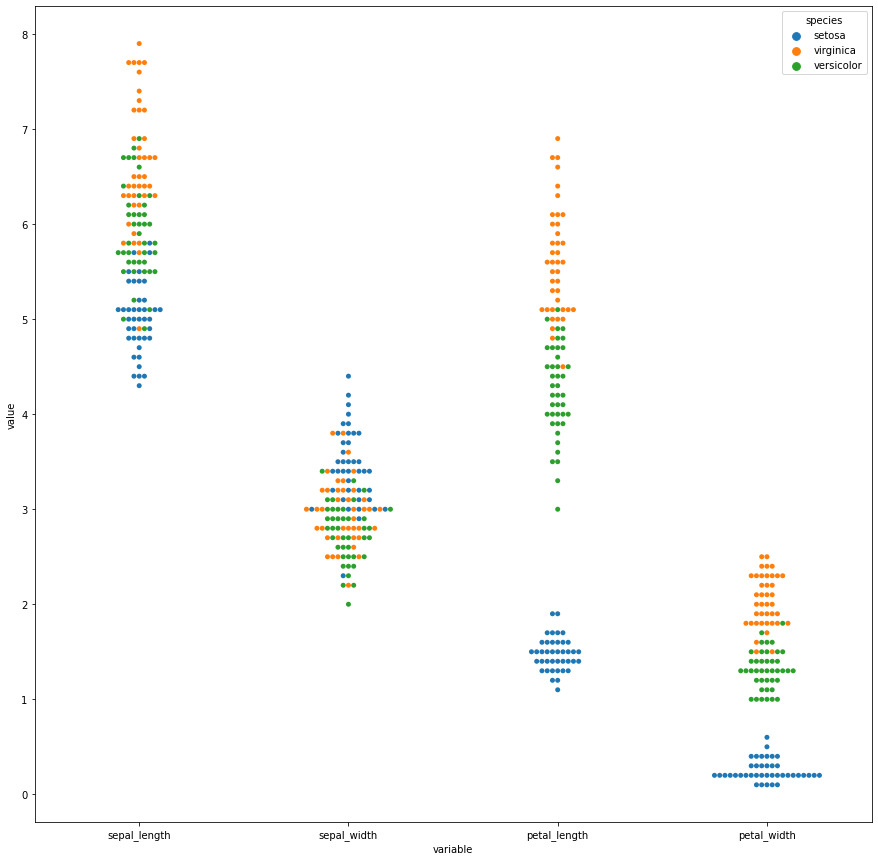

In [44]:
plt.figure(figsize = (15,15))
sns.swarmplot(data = b, x = 'variable', y = 'value', hue = 'species')

#### Takeaways:
   - Petal length and petal width can be used to easily classify between the species of the flower
   

In [45]:
x = train.melt(id_vars = 'species')

<AxesSubplot:xlabel='variable', ylabel='value'>

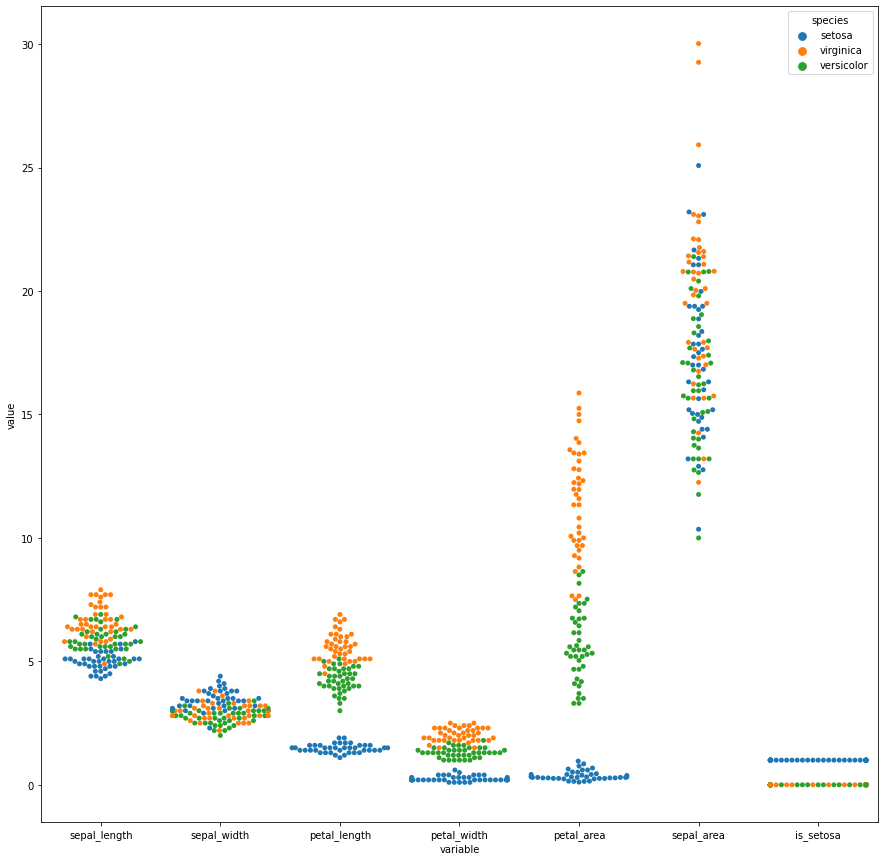

In [46]:
plt.figure(figsize = (15,15))
sns.swarmplot(data = x, x = 'variable', y = 'value', hue = 'species')

#### Creating subplot using matplotlib

TypeError: title() got multiple values for argument 'label'

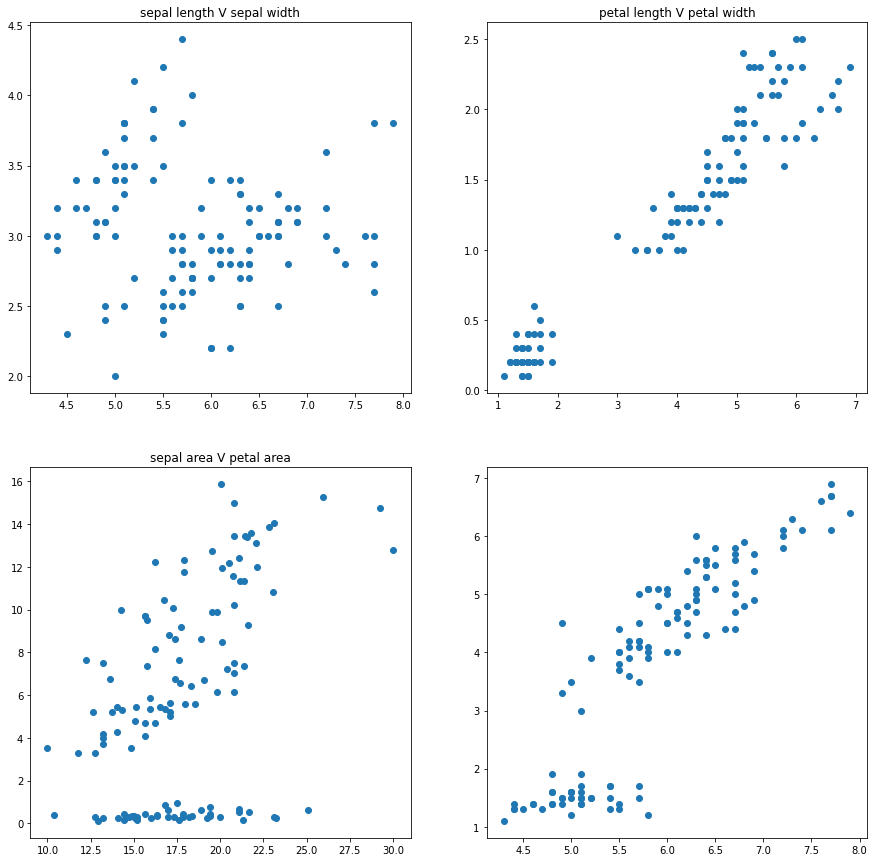

In [47]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
x = train.sepal_length
y = train.sepal_width
plt.scatter(x,y, label = 'species')
plt.title('sepal length V sepal width')

plt.subplot(2,2,2)
x = train.petal_length
y = train.petal_width
plt.scatter(x,y, label = 'species')
plt.title('petal length V petal width')


plt.subplot(2,2,3)
x = train.sepal_length * train.sepal_width
y = train.petal_width * train.petal_length
plt.scatter(x,y, label = 'species')
plt.title('sepal area V petal area')

plt.subplot(2,2,4)
x = train.sepal_length 
y = train.petal_length

plt.scatter(x,y)
plt.title('sepal length V petal length', label = 'species')
plt.labels()
plt.show()

In [ ]:
train['petal_area'] = train.petal_length * train.petal_width
train['sepal_area'] = train.sepal_length * train.sepal_width
fig, axs = plt.subplots(2,2, figsize = (12,12))
sns.scatterplot(ax = axs[0,0], data = train, x = 'sepal_length', y = 'sepal_width')
sns.scatterplot(ax = axs[0,1], data = train, x = 'petal_length', y = 'petal_width')
sns.scatterplot(ax = axs[1,0], data = train, x = 'sepal_length', y = 'petal_length')
sns.scatterplot(ax = axs[1,1], data = train, x = 'sepal_area', y = 'petal_area')

#### lets create subplot using seaborn

In [ ]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "sepal_length", "sepal_width", alpha=1,color="#334488")

In [ ]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "petal_length" , "petal_width", alpha=1,color="#334488")

<Figure size 1080x720 with 0 Axes>

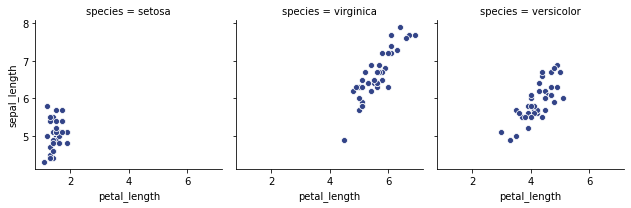

In [48]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "petal_length" , "sepal_length", alpha=1,color="#334488")
plt.show()


#### lets try to get a better visual where we can compare all of this in the same plot

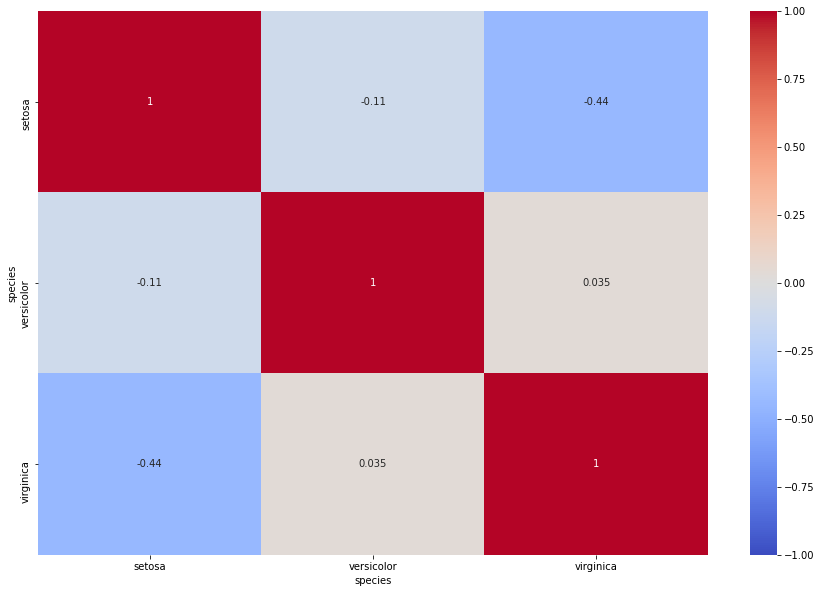

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(pd.crosstab(train.sepal_length, train.species).corr(), vmin = -1, cmap = 'coolwarm', annot = True)
# plt.figure(figsize = (10,10))
# sns.heatmap(x, annot = True)
plt.show()

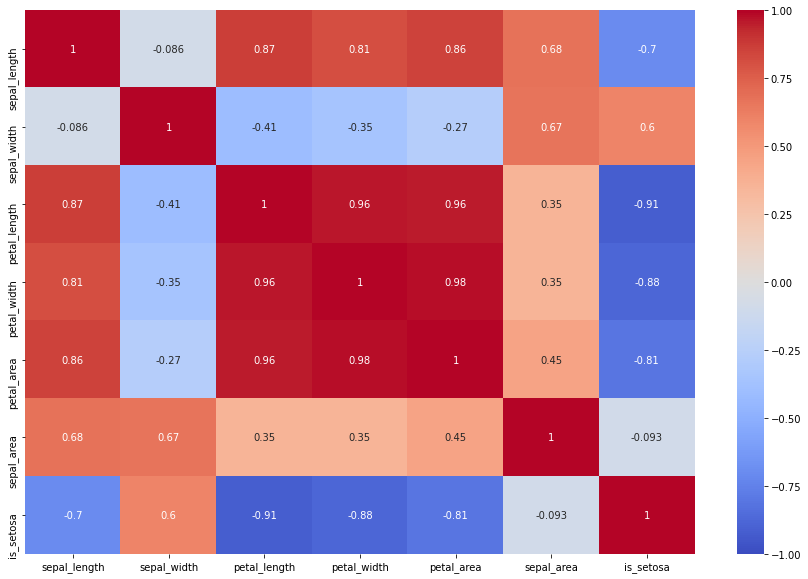

In [50]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

#### Create a scatter matrix visualizing interaction of each variable

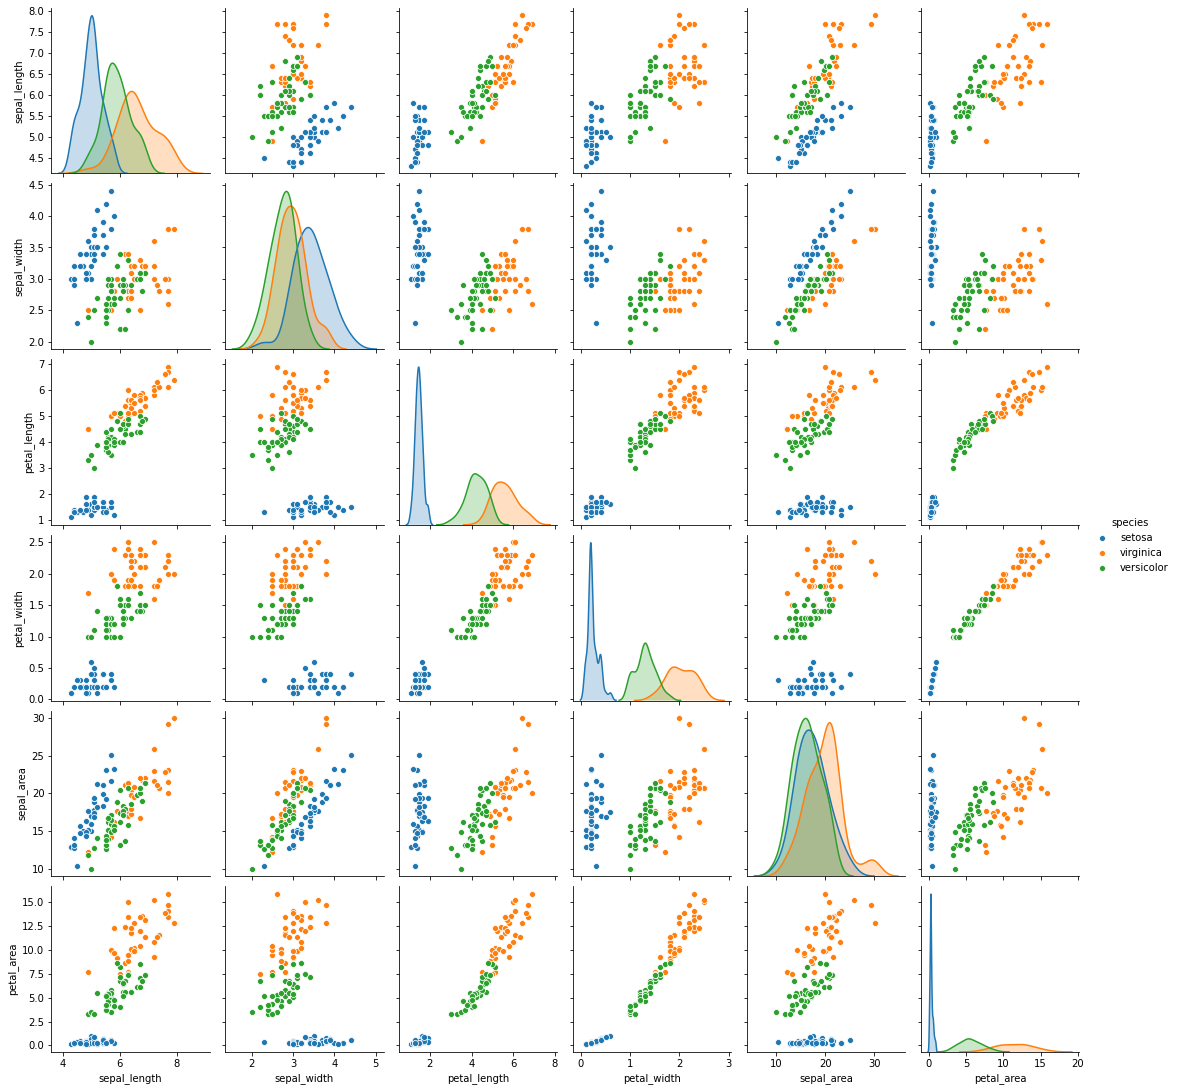

In [51]:
sns.pairplot(train, hue = 'species', vars = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'sepal_area', 'petal_area'])
plt.show()

#### Takeaways:
   - Petal length and petal width can be used to easily classify between the species of the flower

#### Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this

<AxesSubplot:xlabel='sepal_length'>

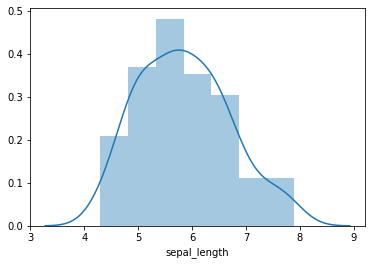

In [52]:
sns.distplot(train.sepal_length) # our data seems to be normally distributed

In [53]:
train.shape #  we have large enough sample

(121, 8)

$H_0$: Mean_Sepal_Length_Virginica = Mean_Sepal_Length_Versicolor

$H_a$: Mean_Sepal_Length_Virginica != Mean_Sepal_Length_Versicolor

In [54]:
df_vir = train[train.species == 'virginica'].sepal_length
df_ver = train[train.species == 'versicolor'].sepal_length

In [55]:
# we will set our a to be 0.05
a = 0.05

In [56]:
df_vir.var(), df_ver.var() # the variance is not significant

(0.4468653846153846, 0.23747560975609755)

In [57]:
t, p = stats.ttest_ind(df_vir, df_ver)
t, p 

(5.60798169040284, 2.905751444977232e-07)

In [58]:
if p < a:
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")



We reject the null hypothesis


In [59]:
# This test result can be interpreted as that the sepal length of these two sepcies vary significantly. It is possibly
# an idication that we can differentiate between these two species solely based on their sepal lenght

## Classification Model Evaluation Class

- A model is an approximation of reality.
- We must at all time evaluate the performance of our model


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [60]:
train.head()


,species,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area,is_setosa
7,setosa,5.0,3.4,1.5,0.2,0.30,17.00,True
13,setosa,4.3,3.0,1.1,0.1,0.11,12.90,True
143,virginica,6.8,3.2,5.9,2.3,13.57,21.76,False
83,versicolor,6.0,2.7,5.1,1.6,8.16,16.20,False
104,virginica,6.5,3.0,5.8,2.2,12.76,19.50,False


#### lets get our features and target feature ready

In [69]:
y_train = train.is_setosa
x_train = train.drop(columns = ['is_setosa', 'species'])

In [136]:
# creating our first model

logit1 = LogisticRegression(random_state = 123)

In [137]:
logit1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_pred1 = logit1.predict(x_train)
df = pd.DataFrame(y_pred1, y_train)
df

,0
is_setosa,
True,True
True,True
False,False
False,False
False,False
False,False
False,False
False,False
False,False


In [139]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        81
        True       1.00      1.00      1.00        40

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



In [140]:
y_pred1_proba = logit1.predict_proba(x_train)

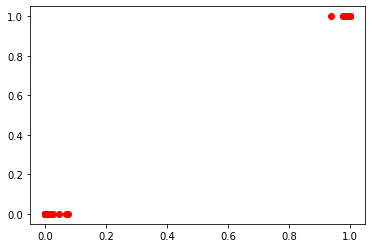

In [141]:
plt.scatter(y_pred1_proba[:,1], y_pred1, color = 'red')

In [143]:
## lets create model 2 by changing hyperparameter C to 0.0010

logit2 = LogisticRegression(C=.0010, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
logit2.fit(x_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y_pred2 = logit2.predict(x_train)

In [146]:
y_pred2_proba = logit2.predict_proba(x_train)

In [147]:
print(classification_report(y_train, y_pred2 ))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        81
        True       1.00      1.00      1.00        40

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



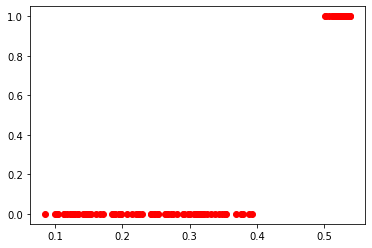

In [148]:
plt.scatter(y_pred2_proba[:,1],  y_pred2,color = 'red')

In [150]:
## lets create model 2 by changing  hyperparameter C to 0.0001

logit3 = LogisticRegression(C=.00010, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
logit3.fit(x_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred3 = logit3.predict(x_train)

In [153]:
y_pred3_proba = logit3.predict_proba(x_train)

In [154]:
print(classification_report(y_train, y_pred3 ))

              precision    recall  f1-score   support

       False       0.67      1.00      0.80        81
        True       0.00      0.00      0.00        40

    accuracy                           0.67       121
   macro avg       0.33      0.50      0.40       121
weighted avg       0.45      0.67      0.54       121



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


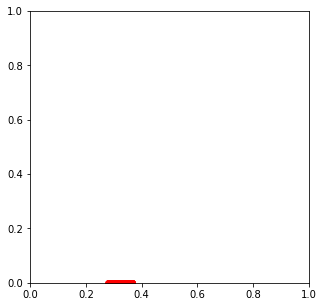

In [156]:
plt.figure(figsize = (5,5))
plt.scatter(y_pred3_proba[:,1],  y_pred3,color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

#### After changing the value of C to be really small, the accuracy dcreased significantly





## Lets change other hyperparameters

In [121]:
# lets create model 4 by changing the predictors

x_train2 = train[['sepal_length', 'sepal_width', 'sepal_area']]
y_train2 = train.is_setosa

In [157]:
logit4 = LogisticRegression(random_state = 123)

In [158]:
logit4.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_pred4 = logit4.predict(x_train2)

In [160]:
print(classification_report(y_train2, y_pred4))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        81
        True       1.00      1.00      1.00        40

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



#### So basically, this model can predict if an observation is setosa or not just by looking at sepal length, sepal width, and sepal area